In [1]:
using Revise
using Plots
# plotly()
gr()
using IES
using StatsBase
using LinearAlgebra

In [2]:
function dataset(p=10, N=500)

    X = zeros(p, N)
    X[1,:] = 6*rand(N)
    X[2,:] =   rand(N)
    cc = deepcopy(X[2,:])

    # Rotate the rectangular strip
    function randRotation(p)
        R = diagm(ones(p))
        i,j = samplepair(1:p)
        θ = 2π*rand()
        R[i,i] = cos(θ)
        R[i,j] = -sin(θ)
        R[j,i] = sin(θ)
        R[j,j] = cos(θ)
        R
    end

    for _ in 1:500
        X = randRotation(p) * X
    end
    X
end

dataset (generic function with 3 methods)

Laplacian sparsity = 0.8660565
IES for 2 elements.
IES for 3 elements.
IES for 4 elements.
IES for 5 elements.
IES for 6 elements.
IES for 7 elements.
IES for 8 elements.
IES for 9 elements.
IES for 10 elements.
IES for 11 elements.
IES for 12 elements.
IES for 13 elements.
IES for 14 elements.
IES for 15 elements.
IES for 16 elements.
IES for 17 elements.
IES for 18 elements.
IES for 19 elements.
IES for 20 elements.


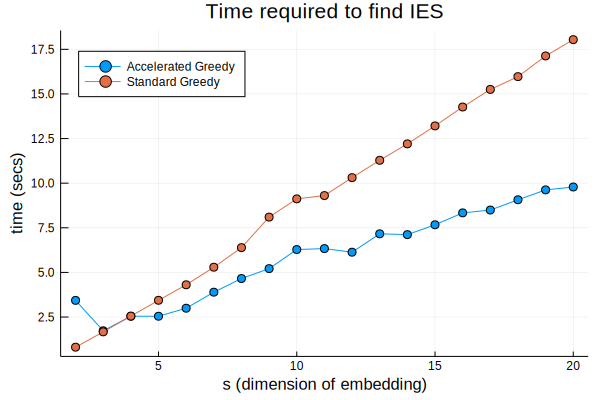

In [3]:
times = Dict(:br => [], :ag => [], :sg => [])
n = 2000

ζ = 0.1
p = 3
X = dataset(p, n)
DM = DiffMap(X, m=40, σ=0.2);
mfd = rmetric(DM, d=2);

slst = 2:20
for s in slst
    println("IES for $s elements.")
#     tic = time()
#     S = ies(mfd, :br, s=s, ζ=ζ)
#     println(S)
#     push!(times[:br], time() - tic)
    
    tic = time()
    S = ies(mfd, :ag, s=s, ζ=ζ)
    push!(times[:ag], time() - tic)

    tic = time()
    S = ies(mfd, :sg, s=s, ζ=ζ)
    push!(times[:sg], time() - tic)
end

plot(slst, times[:ag], label="Accelerated Greedy", markershape=:circle, legend=:topleft, xlabel="s (dimension of embedding)", ylabel="time (secs)",
    title="Time required to find IES")
plot!(slst, times[:sg], label="Standard Greedy", markershape=:circle)
# plot!(slst, times[:br])


Laplacian sparsity = 0.8655725
IES for 2 elements.
IES for 3 elements.
IES for 4 elements.
IES for 5 elements.
IES for 6 elements.
IES for 7 elements.
IES for 8 elements.
IES for 9 elements.
IES for 10 elements.
IES for 11 elements.
IES for 12 elements.
IES for 13 elements.
IES for 14 elements.
IES for 15 elements.
IES for 16 elements.
IES for 17 elements.
IES for 18 elements.
IES for 19 elements.
IES for 20 elements.
IES for 21 elements.
IES for 22 elements.
IES for 23 elements.
IES for 24 elements.
IES for 25 elements.
IES for 26 elements.
IES for 27 elements.
IES for 28 elements.
IES for 29 elements.
IES for 30 elements.


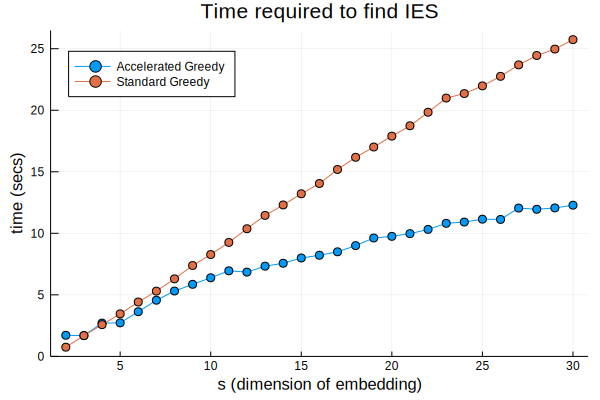

In [6]:
times = Dict(:br => [], :ag => [], :sg => [])
n = 2000

ζ = 0.1
p = 4
X = dataset(p, n)
DM = DiffMap(X, m=40, σ=0.2);
mfd = rmetric(DM, d=2);

slst = 2:30
ies(mfd, :ag, s=2, ζ=ζ)
ies(mfd, :sg, s=2, ζ=ζ)
for s in slst
    println("IES for $s elements.")
#     tic = time()
#     S = ies(mfd, :br, s=s, ζ=ζ)
#     println(S)
#     push!(times[:br], time() - tic)
    
    tic = time()
    S = ies(mfd, :ag, s=s, ζ=ζ)
    push!(times[:ag], time() - tic)

    tic = time()
    S = ies(mfd, :sg, s=s, ζ=ζ)
    push!(times[:sg], time() - tic)
end

plot(slst, times[:ag], label="Accelerated Greedy", markershape=:circle, legend=:topleft, xlabel="s (dimension of embedding)", ylabel="time (secs)",
    title="Time required to find IES")
plot!(slst, times[:sg], label="Standard Greedy", markershape=:circle)
savefig("imgs/times_s.png")
